In [1]:
import quimb.tensor as qtn

from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import TEBD

In [2]:
d = 2
N = 10
bond_dim = 16

In [3]:
lmda = 0
ham_ising = IsingHamiltonian(N, lmda)

In [4]:
ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 16), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(16, 2, 16), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(16, 2, 16), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(16, 2, 16), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(16, 2, 16), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(16, 2, 16), inds=('i4', 'k5', 'i5'), tags=oset(['state 6'])),
 Tensor(shape=(16, 2, 16), inds=('i5', 'k6', 'i6'), tags=oset(['state 7'])),
 Tensor(shape=(16, 2, 16), inds=('i6', 'k7', 'i7'), tags=oset(['state 8'])),
 Tensor(shape=(16, 2, 16), inds=('i7', 'k8', 'i8'), tags=oset(['state 9'])),
 Tensor(shape=(16, 2), inds=('i8', 'k9'), tags=oset(['state 10']))]

In [7]:
tebd_obj = TEBD(MPS, ham_ising, evol_type='imag')

In [8]:
rho = tebd_obj.mps.rho()
rho

<TensorNetwork(tensors=20, indices=38)>

In [9]:
print(rho)

TensorNetwork([
    Tensor(shape=(2, 16), inds=('k0', 'i0'), tags=oset(['state 1'])),
    Tensor(shape=(16, 2, 16), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
    Tensor(shape=(16, 2, 16), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
    Tensor(shape=(16, 2, 16), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
    Tensor(shape=(16, 2, 16), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
    Tensor(shape=(16, 2, 16), inds=('i4', 'k5', 'i5'), tags=oset(['state 6'])),
    Tensor(shape=(16, 2, 16), inds=('i5', 'k6', 'i6'), tags=oset(['state 7'])),
    Tensor(shape=(16, 2, 16), inds=('i6', 'k7', 'i7'), tags=oset(['state 8'])),
    Tensor(shape=(16, 2, 16), inds=('i7', 'k8', 'i8'), tags=oset(['state 9'])),
    Tensor(shape=(16, 2), inds=('i8', 'k9'), tags=oset(['state 10'])),
    Tensor(shape=(2, 16), inds=('k10', 'i9'), tags=oset(['state 1 conj'])),
    Tensor(shape=(16, 2, 16), inds=('i9', 'k11', 'i10'), tags=oset(['state 2 conj'])),
    Tensor(shape=(16, 2, 16), inds=('i10

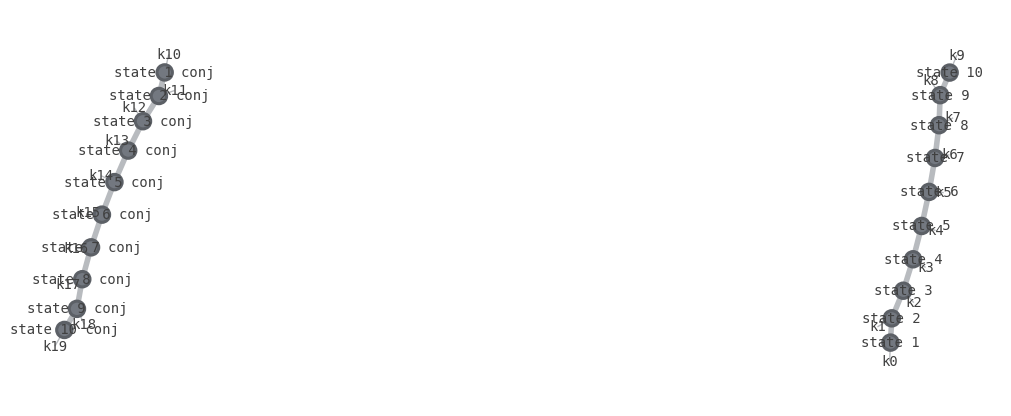

In [10]:
rho.draw(figsize=(10, 10))

In [11]:
tau = 0.1

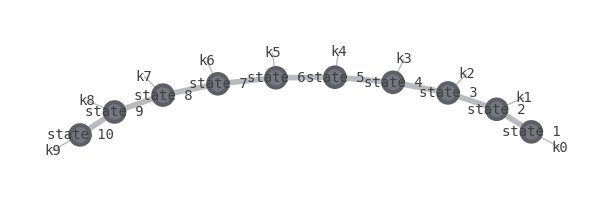

In [12]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [13]:
tebd_obj.step(tau)

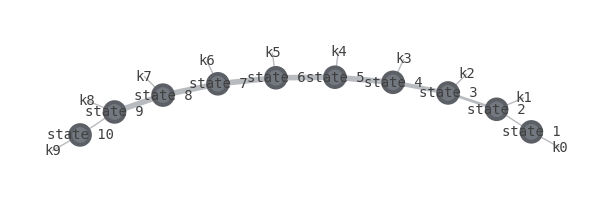

In [14]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [15]:
tebd_obj.step(tau)

In [16]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 8), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(8, 2, 16), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(16, 2, 16), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(16, 2, 16), inds=('i4', 'k5', 'i5'), tags=oset(['state 6'])),
 Tensor(shape=(16, 2, 16), inds=('i5', 'k6', 'i6'), tags=oset(['state 7'])),
 Tensor(shape=(16, 2, 4), inds=('i6', 'k7', 'i7'), tags=oset(['state 8'])),
 Tensor(shape=(4, 2, 2), inds=('i7', 'k8', 'i8'), tags=oset(['state 9'])),
 Tensor(shape=(2, 2), inds=('i8', 'k9'), tags=oset(['state 10']))]

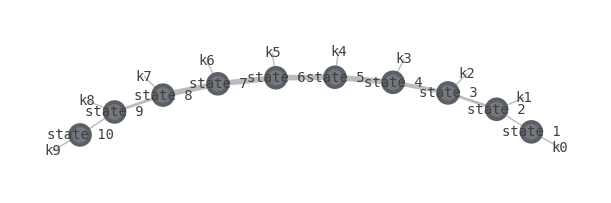

In [17]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [18]:
tebd_obj.step(tau)

In [19]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 8), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(8, 2, 16), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(16, 2, 16), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(16, 2, 16), inds=('i4', 'k5', 'i5'), tags=oset(['state 6'])),
 Tensor(shape=(16, 2, 8), inds=('i5', 'k6', 'i6'), tags=oset(['state 7'])),
 Tensor(shape=(8, 2, 4), inds=('i6', 'k7', 'i7'), tags=oset(['state 8'])),
 Tensor(shape=(4, 2, 2), inds=('i7', 'k8', 'i8'), tags=oset(['state 9'])),
 Tensor(shape=(2, 2), inds=('i8', 'k9'), tags=oset(['state 10']))]

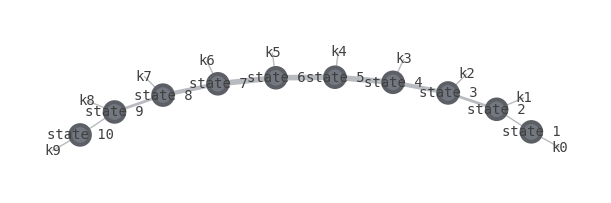

In [20]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [21]:
numiter = 500

In [22]:
for k in range(numiter):
    tebd_obj.step(tau)

In [23]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 8), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(8, 2, 16), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(16, 2, 16), inds=('i3', 'k4', 'i4'), tags=oset(['state 5'])),
 Tensor(shape=(16, 2, 16), inds=('i4', 'k5', 'i5'), tags=oset(['state 6'])),
 Tensor(shape=(16, 2, 8), inds=('i5', 'k6', 'i6'), tags=oset(['state 7'])),
 Tensor(shape=(8, 2, 4), inds=('i6', 'k7', 'i7'), tags=oset(['state 8'])),
 Tensor(shape=(4, 2, 2), inds=('i7', 'k8', 'i8'), tags=oset(['state 9'])),
 Tensor(shape=(2, 2), inds=('i8', 'k9'), tags=oset(['state 10']))]